In [11]:
import pendulum
from echo_state_network import ESN
import numpy as np
import matplotlib.pyplot as plt
import keras

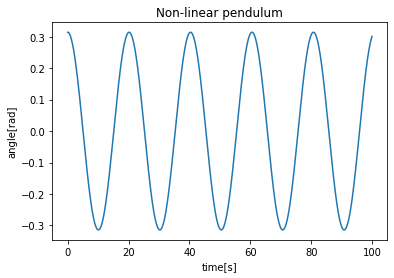

In [13]:
time = np.arange(0, 100, 0.01)
angle = pendulum.theta(time)


plt.plot(time, angle)
plt.title('Non-linear pendulum')
plt.xlabel('time[s]')
plt.ylabel('angle[rad]')

cutoff = int(len(time) * 0.8)

training_input = time[0:cutoff]
training_output = angle[0:cutoff]

validation_input = time[cutoff:]
validation_output = angle[cutoff:]

Computing error vs reservoir dependence might take a while


Text(0.5, 1.0, 'Reservoir size vs error')

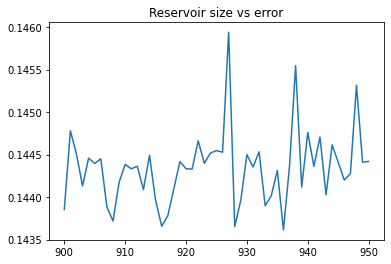

In [11]:
weights = []
losses = []
sizes = [n for n in range(900, 951)]

print('Computing error vs reservoir dependence might take a while')

for n in sizes:
    esn = ESN(1, 1, n_reservoir=n)
    weights.append(esn.fit(training_input, training_output))
    results = esn.predict(validation_input)[0]
    
    loss = (results - validation_output) ** 2
    losses.append(loss.mean())

plt.plot(sizes, losses)
plt.title('Reservoir size vs error')

In [9]:
#Making actual predictions on data


optimal_esn = ESN(1, 1, 5000, silent=False)

optimal_esn.fit(training_input, training_output)

harvesting states...
fitting...
training error:
0.0035135336629849396


array([[0.        ],
       [0.31415848],
       [0.31415367],
       ...,
       [0.30536322],
       [0.30558529],
       [0.30572636]])

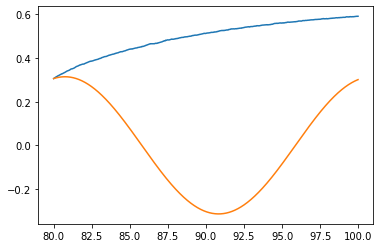

In [10]:
predictions = optimal_esn.predict(validation_input)
plt.plot(validation_input, predictions, validation_input, validation_output)

In [ ]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

model.fit(training_input, training_output, epochs=100, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 64)                128       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
250/250 [==============================] - 0s 670us/step - loss: 0.3211
Epoch 2/100
250/250 [==============================] - 0s 682us/step - loss: 0.0507
Epoch 3/100
250/